In [1]:
! pip install praw

In [3]:
import praw
import json
import time
from datetime import datetime, timezone
from collections import defaultdict
import matplotlib.pyplot as plt
import tqdm

DATA_DIR = "reddit_posts.json"
REDDIT_SECRET_DIR = "redditSecret"
TARGET_SUBREDDIT = "lethalcompany"

In [4]:
with open(REDDIT_SECRET_DIR,'r') as f:
    cid = f.readline().strip()
    csc = f.readline().strip()
    uag = f.readline().strip()

reddit = praw.Reddit(
    client_id=cid,
    client_secret=csc,
    user_agent=uag
)

# test
for submission in reddit.subreddit("Python").hot(limit=5):
    print(submission.title)


Sunday Daily Thread: What's everyone working on this week?
Wednesday Daily Thread: Beginner questions
PyPI security funding in limbo as Trump executive order pauses NSF grant reviews
Python 1.0.0, released 31 years ago today
What was for you the biggest thing that happened in the Python ecosystem in 2024?


In [ ]:
def count_posts_in_subreddit(subreddit_name, limit=1000):
    count = 0
    try:
        # 서브레딧의 게시물 가져오기
        subreddit = reddit.subreddit(subreddit_name)
        for post in tqdm.tqdm(subreddit.new(limit=limit)):  # 최대 limit 개수의 게시물 가져오기
            count += 1

        return count
    except Exception as e:
        print(f"오류 발생: {e}")
        return None

# 서브레딧 이름
subreddit = TARGET_SUBREDDIT

# 게시물 개수 세기
total_posts = count_posts_in_subreddit(subreddit, reddit, limit=1000)
if total_posts is not None:
    print(f"서브레딧 '{subreddit}'의 게시물 개수 (최대 1000개): {total_posts}")
else:
    print("게시물 개수를 가져오는 데 실패했습니다.")


0it [00:00, ?it/s]

998it [00:16, 60.01it/s]

서브레딧 'lethalcompany'의 게시물 개수 (최대 1000개): 998


In [11]:
def count_posts_by_date(subreddit_name, limit=1000):
    # 날짜별 게시물 수를 저장할 딕셔너리
    post_counts = defaultdict(int)

    try:
        subreddit = reddit.subreddit(subreddit_name)

        # 최신 게시물 가져오기
        for post in tqdm.tqdm(subreddit.new(limit=limit)):
            # Unix 타임스탬프를 날짜로 변환
            post_date = datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d')
            post_counts[post_date] += 1

        return post_counts
    except Exception as e:
        print(f"오류 발생: {e}")
        return None

# 서브레딧 이름
subreddit = "lethalcompany"

# 날짜별 게시물 수 계산
post_counts_by_date = count_posts_by_date(subreddit, limit=1000)
if post_counts_by_date:
    print(f"서브레딧 '{subreddit}'의 날짜별 게시물 수:")
    for date, count in sorted(post_counts_by_date.items()):
        print(f"{date}: {count}개")
else:
    print("날짜별 게시물 수를 가져오는 데 실패했습니다.")


0it [00:00, ?it/s]/var/folders/rs/gj1qtfn50f91xp32471rcq500000gn/T/ipykernel_75632/2176455048.py:11: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  post_date = datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d')
998it [00:17, 58.63it/s]

서브레딧 'lethalcompany'의 날짜별 게시물 수:
2024-12-24: 21개
2024-12-25: 29개
2024-12-26: 27개
2024-12-27: 25개
2024-12-28: 30개
2024-12-29: 36개
2024-12-30: 43개
2024-12-31: 27개
2025-01-01: 25개
2025-01-02: 27개
2025-01-03: 28개
2025-01-04: 32개
2025-01-05: 32개
2025-01-06: 31개
2025-01-07: 25개
2025-01-08: 11개
2025-01-09: 16개
2025-01-10: 23개
2025-01-11: 37개
2025-01-12: 27개
2025-01-13: 30개
2025-01-14: 25개
2025-01-15: 23개
2025-01-16: 28개
2025-01-17: 28개
2025-01-18: 36개
2025-01-19: 40개
2025-01-20: 40개
2025-01-21: 41개
2025-01-22: 44개
2025-01-23: 31개
2025-01-24: 30개
2025-01-25: 32개
2025-01-26: 18개


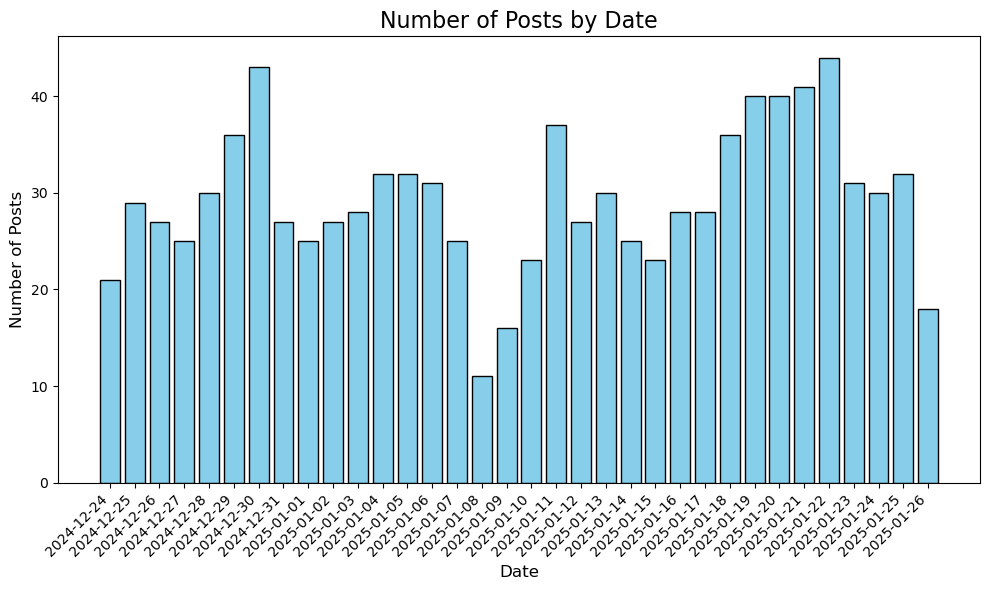

In [14]:
def plot_post_counts(post_counts):
    if not post_counts:
        print("게시물 데이터가 없습니다.")
        return

    # 날짜와 게시물 수 분리
    dates = sorted(post_counts.keys())
    counts = [post_counts[date] for date in dates]

    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.bar(dates, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Posts', fontsize=12)
    plt.title('Number of Posts by Date', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # 그래프 보여주기
    plt.show()

plot_post_counts(post_counts_by_date)

In [7]:
# 데이터 저장 함수 (1000개씩 로컬에 저장)
def save_to_file(data):
    with open(DATA_DIR, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

# 데이터 불러오기 함수 (기존 데이터 유지)
def load_existing_data():
    try:
        with open(DATA_DIR, "r", encoding="utf-8") as f:
            return json.load(f)
    except FileNotFoundError:
        return {}

# 날짜별 게시물 수를 가져오는 함수
def fetch_reddit_posts(subreddit_name, total_limit=5000, batch_size=1000):
    subreddit = reddit.subreddit(subreddit_name)

    # 기존 데이터 불러오기
    existing_data = load_existing_data()
    existing_ids = set(existing_data.keys())

    # 게시물 개수 저장
    post_counts = defaultdict(int)
    fetched_count = 0

    # tqdm을 이용한 진행 상태 표시
    progress_bar = tqdm.tqdm(total=total_limit, desc="Fetching Posts", unit="post")

    while fetched_count < total_limit:
        try:
            # `before`를 사용하여 점점 과거로 이동
            new_posts = list(subreddit.new(limit=batch_size))

            # 만약 가져온 게시글이 없으면 종료
            if not new_posts:
                break

            for post in new_posts:
                post_id = post.id
                post_date = datetime.fromtimestamp(post.created_utc, tz=timezone.utc).strftime('%Y-%m')

                # 중복 데이터 필터링
                if post_id not in existing_ids:
                    existing_ids.add(post_id)
                    existing_data[post_id] = post_date
                    post_counts[post_date] += 1
                    fetched_count += 1
                    progress_bar.update(1)  # 📌 진행 상태 업데이트

            # 1000개 단위로 저장
            if fetched_count % batch_size == 0:
                save_to_file(existing_data)
                print(f"✅ {fetched_count}개 저장 완료...")

            # 요청 간격 조절 (API 제한 방지)
            time.sleep(2)

        except Exception as e:
            print(f"⚠️ 오류 발생: {e}")
            time.sleep(5)  # 잠시 대기 후 재시도

    # 최종 데이터 저장
    save_to_file(existing_data)
    progress_bar.close()  # 📌 tqdm 종료
    print(f"✅ 총 {fetched_count}개 게시물 수집 완료!")

    return post_counts

def plot_post_counts(post_counts):
    if not post_counts:
        print("📌 게시물 데이터가 없습니다.")
        return

    # 날짜별 정렬
    dates = sorted(post_counts.keys())
    counts = [post_counts[date] for date in dates]

    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.bar(dates, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Posts', fontsize=12)
    plt.title('Number of Posts by Date', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # 그래프 보여주기
    plt.show()

# Reddit에서 데이터 가져오기 (최대 5000개)
post_counts_by_date = fetch_reddit_posts(TARGET_SUBREDDIT, total_limit=5000, batch_size=1000)

# 그래프 출력
plot_post_counts(post_counts_by_date)


Fetching Posts:   0%|          | 0/5000 [00:00<?, ?post/s]

✅ 0개 저장 완료...
✅ 0개 저장 완료...
✅ 0개 저장 완료...
✅ 0개 저장 완료...
✅ 0개 저장 완료...
✅ 0개 저장 완료...


KeyboardInterrupt: 

In [13]:
subreddit_name = TARGET_SUBREDDIT
subreddit = reddit.subreddit(subreddit_name)

# 저장할 파일 이름
output_file = "reddit_posts.json"

# 게시물 저장 리스트
all_posts = []
batch_size = 100  # 한 번에 가져올 개수
max_posts = 1200  # 가져올 총 게시물 수 (필요에 따라 변경 가능)
last_post_id = None  # 가장 마지막 게시물 ID

# 진행 상황 출력

while len(all_posts) < max_posts:
    params = {}
    if last_post_id:
        params["after"] = last_post_id  # 마지막 게시물 이후 가져오기
    
    # 최신 게시물 가져오기
    posts = list(subreddit.new(limit=batch_size, params=params))
    print ("requested after : ", last_post_id)
    if not posts:
        print("📌 더 이상 가져올 게시물이 없습니다!")
        break
    
    # 데이터 저장
    for post in posts:
        all_posts.append({
            "id": post.id,
            "title": post.title,
            "created_utc": post.created_utc
        })
    
    # 최신 ID 업데이트
    last_post_id = posts[-1].name  # 't3_xxxxxx' 형식
    print("last post id:", last_post_id)
    
    # JSON으로 저장 (1000개마다)
    if len(all_posts) % batch_size == 0:
        with open(output_file, "w", encoding="utf-8") as f:
            json.dump(all_posts, f, ensure_ascii=False, indent=4)
        print(f"✅ {len(all_posts)}개 저장 완료...")
    
    # Reddit API 부하 방지
    time.sleep(1)

# 최종 저장
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(all_posts, f, ensure_ascii=False, indent=4)

print(f"🚀 전체 {len(all_posts)}개 게시물 저장 완료!")


requested after :  None
last post id: t3_1iaws3z
✅ 100개 저장 완료...
requested after :  t3_1iaws3z
last post id: t3_1i8ntia
✅ 200개 저장 완료...
requested after :  t3_1i8ntia
last post id: t3_1i6i59z
✅ 300개 저장 완료...
requested after :  t3_1i6i59z
last post id: t3_1i4mncr
✅ 400개 저장 완료...
requested after :  t3_1i4mncr
last post id: t3_1i23b1g
✅ 500개 저장 완료...
requested after :  t3_1i23b1g
last post id: t3_1hz8bdy
✅ 600개 저장 완료...
requested after :  t3_1hz8bdy
last post id: t3_1hvphr7
✅ 700개 저장 완료...
requested after :  t3_1hvphr7
last post id: t3_1ht2fvl
✅ 800개 저장 완료...
requested after :  t3_1ht2fvl
last post id: t3_1hq9mju
✅ 900개 저장 완료...
requested after :  t3_1hq9mju
last post id: t3_1hof9yb
requested after :  t3_1hof9yb
📌 더 이상 가져올 게시물이 없습니다!
🚀 전체 994개 게시물 저장 완료!


In [14]:
import requests
import pandas as pd
from datetime import datetime
import time

def get_monthly_post_counts(subreddit):
    """
    Pushshift API를 사용하여 서브레딧의 월별 게시글 수를 가져옵니다.
    
    Parameters:
    subreddit (str): 서브레딧 이름
    
    Returns:
    dict: 월별 게시글 수
    """
    posts = []
    # 현재 시간을 Unix timestamp로 변환
    current_time = int(datetime.now().timestamp())
    
    while True:
        url = "https://api.pushshift.io/reddit/submission/search"
        params = {
            "subreddit": subreddit,
            "before": current_time,
            "size": 500,  # 한 번에 가져올 게시글 수
            "sort": "desc",
            "sort_type": "created_utc"
        }
        
        try:
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()['data']
                if not data:  # 더 이상 데이터가 없으면 종료
                    break
                    
                posts.extend(data)
                current_time = data[-1]['created_utc']  # 마지막 게시글의 시간으로 업데이트
                print(f"수집된 게시글 수: {len(posts)}")
                
                time.sleep(1)  # API 부하 방지를 위한 대기
                
            else:
                print(f"API 요청 실패: {response.status_code}")
                time.sleep(5)
                
        except Exception as e:
            print(f"에러 발생: {e}")
            time.sleep(5)
    
    # 수집된 데이터를 DataFrame으로 변환
    df = pd.DataFrame(posts)
    df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
    df['year_month'] = df['created_utc'].dt.strftime('%Y-%m')
    
    # 월별 게시글 수 계산
    monthly_counts = df['year_month'].value_counts().sort_index()
    
    return monthly_counts

if __name__ == "__main__":
    subreddit_name = "lethalcompany"
    print(f"r/{subreddit_name} 서브레딧의 게시글을 수집하는 중...")
    
    monthly_counts = get_monthly_post_counts(subreddit_name)
    
    print("\n월별 게시글 수:")
    for month, count in monthly_counts.items():
        print(f"{month}: {count:,}개")

r/lethalcompany 서브레딧의 게시글을 수집하는 중...
API 요청 실패: 403
API 요청 실패: 403
API 요청 실패: 403


KeyboardInterrupt: 

In [15]:
def count_subreddit_comments(subreddit_name, client_id, client_secret):
    """
    서브레딧의 게시글별 댓글 수를 집계합니다.
    
    Parameters:
    subreddit_name (str): 서브레딧 이름
    client_id (str): Reddit API client ID
    client_secret (str): Reddit API client secret
    
    Returns:
    tuple: (총 댓글 수, 게시글별 댓글 통계)
    """
    
    subreddit = reddit.subreddit(subreddit_name)
    posts_data = []
    after = None
    total_comments = 0
    
    print("게시글 데이터 수집 중...")
    
    while True:
        try:
            # new로 정렬된 게시글을 100개씩 가져옴
            new_posts = subreddit.new(limit=100, params={'after': after})
            batch = list(new_posts)
            
            if not batch:  # 더 이상 가져올 게시글이 없으면 종료
                break
            
            for post in batch:
                post_data = {
                    'created_utc': datetime.fromtimestamp(post.created_utc),
                    'title': post.title,
                    'num_comments': post.num_comments
                }
                posts_data.append(post_data)
                total_comments += post.num_comments
            
            print(f"처리된 게시글 수: {len(posts_data)}, 현재까지 총 댓글 수: {total_comments:,}")
            
            # 다음 페이지를 위한 after 값 업데이트
            after = batch[-1].name
            
            # API 속도 제한 준수
            time.sleep(2)
            
        except Exception as e:
            print(f"에러 발생: {e}")
            time.sleep(5)
    
    # DataFrame 생성 및 통계 계산
    df = pd.DataFrame(posts_data)
    df['year_month'] = df['created_utc'].dt.strftime('%Y-%m')
    
    # 월별 통계 계산
    monthly_stats = df.groupby('year_month').agg({
        'num_comments': ['sum', 'mean', 'count']
    }).round(2)
    
    monthly_stats.columns = ['총_댓글수', '평균_댓글수', '게시글수']
    monthly_stats = monthly_stats.sort_index(ascending=False)
    
    return total_comments, monthly_stats

if __name__ == "__main__":
    # Reddit API 인증 정보
    CLIENT_ID = "YOUR_CLIENT_ID"
    CLIENT_SECRET = "YOUR_CLIENT_SECRET"
    
    subreddit_name = "lethalcompany"
    print(f"r/{subreddit_name} 서브레딧의 댓글 정보를 수집하는 중...")
    
    total_comments, monthly_stats = count_subreddit_comments(
        subreddit_name, 
        CLIENT_ID, 
        CLIENT_SECRET
    )
    
    print(f"\n총 댓글 수: {total_comments:,}")
    print("\n월별 통계:")
    print(monthly_stats)
    
    # 상세 통계 출력
    print("\n상세 월별 통계:")
    for month in monthly_stats.index:
        stats = monthly_stats.loc[month]
        print(f"\n{month}:")
        print(f"- 총 댓글 수: {stats['총_댓글수']:,}")
        print(f"- 게시글 당 평균 댓글 수: {stats['평균_댓글수']:.1f}")
        print(f"- 게시글 수: {stats['게시글수']:,}")

r/lethalcompany 서브레딧의 댓글 정보를 수집하는 중...
게시글 데이터 수집 중...
처리된 게시글 수: 100, 현재까지 총 댓글 수: 676
처리된 게시글 수: 200, 현재까지 총 댓글 수: 1,326
처리된 게시글 수: 300, 현재까지 총 댓글 수: 2,258
처리된 게시글 수: 400, 현재까지 총 댓글 수: 3,239
처리된 게시글 수: 500, 현재까지 총 댓글 수: 4,074
처리된 게시글 수: 600, 현재까지 총 댓글 수: 4,991
처리된 게시글 수: 700, 현재까지 총 댓글 수: 5,812
처리된 게시글 수: 800, 현재까지 총 댓글 수: 6,816
처리된 게시글 수: 900, 현재까지 총 댓글 수: 7,698
처리된 게시글 수: 993, 현재까지 총 댓글 수: 8,504

총 댓글 수: 8,504

월별 통계:
            총_댓글수  평균_댓글수  게시글수
year_month                     
2025-01      7678    8.57   896
2024-12       826    8.52    97

상세 월별 통계:

2025-01:
- 총 댓글 수: 7,678.0
- 게시글 당 평균 댓글 수: 8.6
- 게시글 수: 896.0

2024-12:
- 총 댓글 수: 826.0
- 게시글 당 평균 댓글 수: 8.5
- 게시글 수: 97.0
